In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font_scale=1.6, font='Arial')

## Visualizations of the data and model output

In [64]:
preprocessed_file = '../data/with_summarized_tokenized.csv'
p_df = pd.read_csv(preprocessed_file)
product_counts = p_df['Product'].value_counts().to_dict()

file = '../output/with_summarized.csv'
df = pd.read_csv(file)

### Plot pie chart of complaints by type

In [238]:
shortened = ['Credit Reporting', 'Debt Collection', 'Mortgage', 'Credit Card', 'Banking Service', 'Student Loan',
            'Consumer Loan', 'Money Transfer', 'Personal Loan', 'Others']
labels = list(product_counts.keys())
values = list(product_counts.values())

import plotly.offline as pyo
import plotly.graph_objects as go
import plotly
fig = {'data' : [{'type' : 'pie',
                  'name' : "Complaint Type",
                 'labels' : labels,
                 'values' : values,
                 'direction' : 'clockwise',
                  'showlegend': False,
                  'text': shortened,
                  'textinfo': 'text+value+percent'
                 }],
      'layout' : {'title' : 'Product Complaint by Type'}}
fig = go.Figure(fig)
plotly.offline.plot(fig, filename='proportions.html')

'proportions.html'

### Count the number of words in each complaint

In [65]:
p_df['summ_len'] = p_df['summ'].str.split().str.len()
p_df['orig_len'] = p_df['orig'].str.split().str.len()
p_df = p_df[p_df['summ_len'] < 500]

### Plot the distribution of word counts in complaints before and after summarization

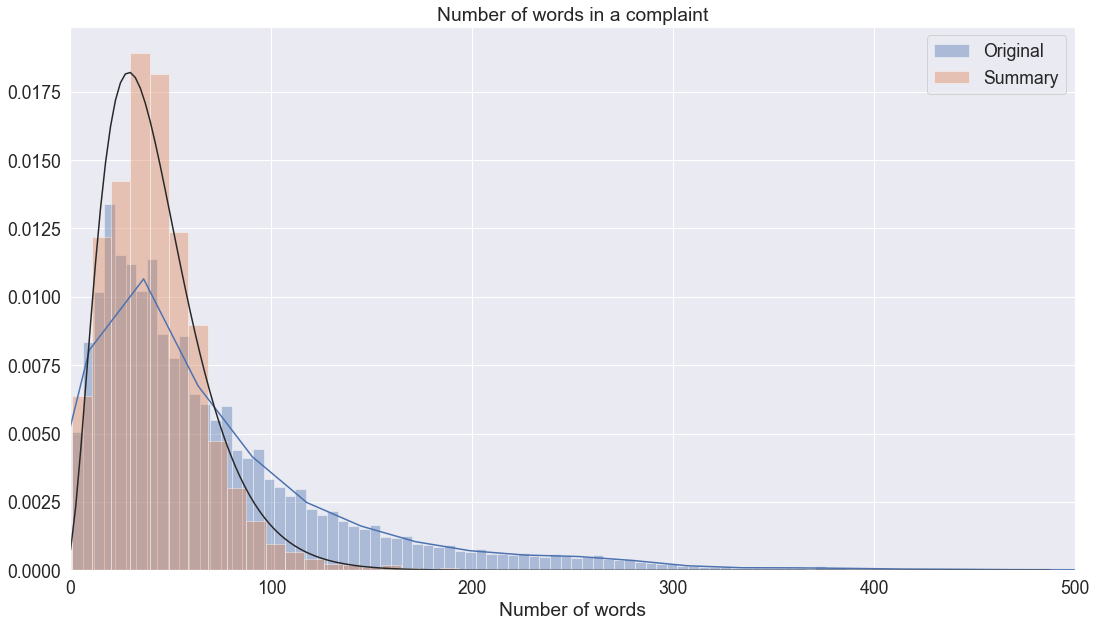

In [106]:
from scipy import stats

f, ax = plt.subplots(figsize=(18, 10))
ax = sns.distplot(p_df['orig_len'], bins=500, label='Original')
ax = sns.distplot(p_df['summ_len'], fit=stats.gamma, kde=False, label='Summary')
ax.set_xlim([0, 500])
ax.set_xlabel('Number of words')
ax.set_title("Number of words in a complaint")
plt.legend();

In [98]:
p_df[['orig_len', 'summ_len']].describe()

,orig_len,summ_len
count,433938.000000,433938.000000
mean,75.516567,42.852924
std,83.625259,26.076125
min,1.000000,1.000000
25%,27.000000,26.000000
50%,51.000000,40.000000
75%,95.000000,55.000000
max,2643.000000,482.000000
